# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Pustaka untuk pengolahan dan manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi dan eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka yang digunakan pada tahap preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Konfigurasi tampilan Pandas agar seluruh kolom terlihat
pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Tentukan lokasi file dataset mentah
# Ubah nama file jika Anda menempatkannya di folder berbeda
raw_data_path = "stroke-data.csv"

# Memuat dataset ke dalam DataFrame pandas
df_raw = pd.read_csv(raw_data_path)

# Menampilkan beberapa baris awal untuk meninjau struktur dataset
print("--- Contoh 5 Baris Data ---")
display(df_raw.head())

# Menampilkan informasi struktur dataset (tipe data dan jumlah nilai non-null)
print("\n--- Informasi Dataset ---")
df_raw.info()

--- Contoh 5 Baris Data ---


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Statistik Deskriptif (Fitur Numerik) ---


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



--- Jumlah Missing Value per Kolom ---


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


--- Distribusi Kolom Target (stroke) ---
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


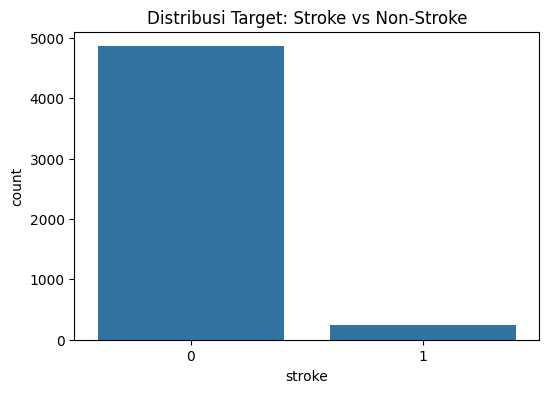

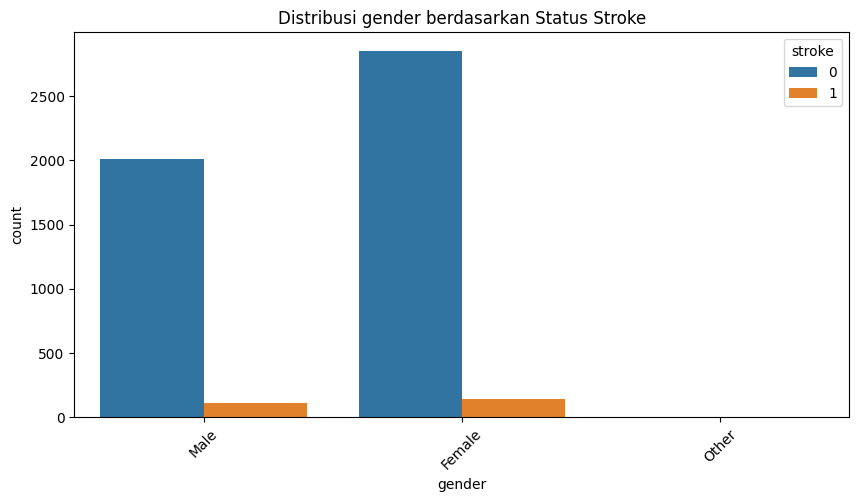

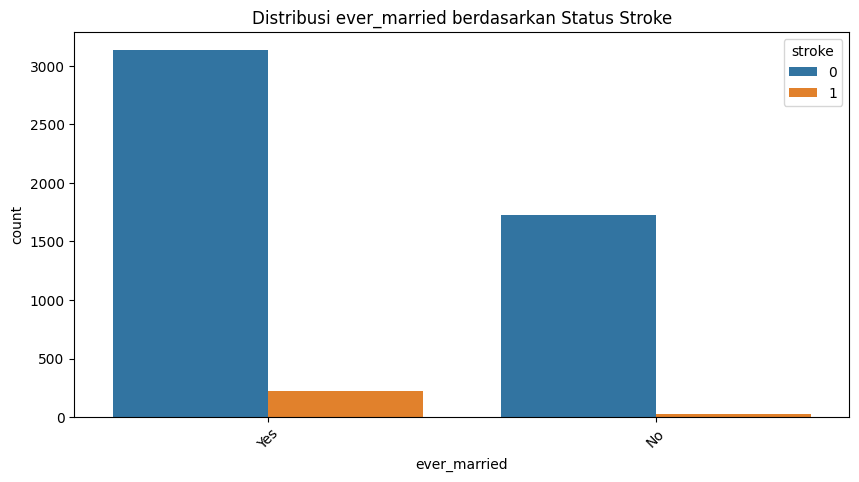

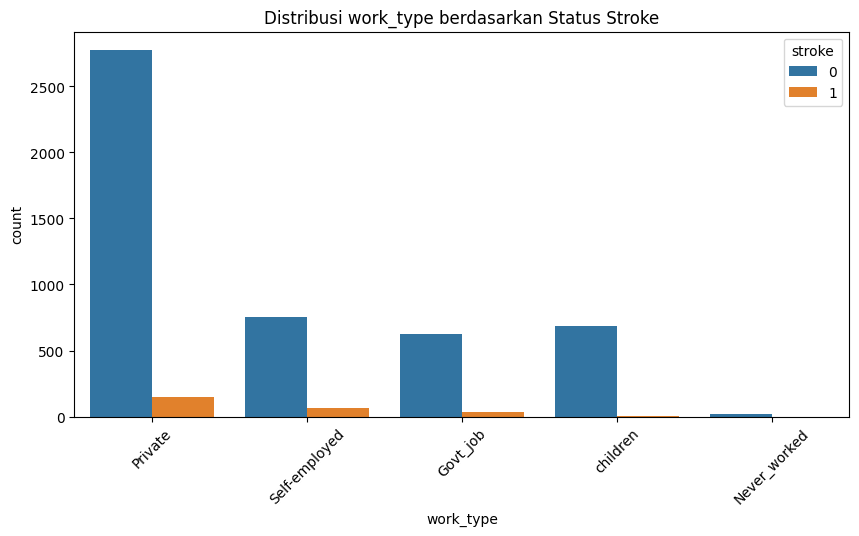

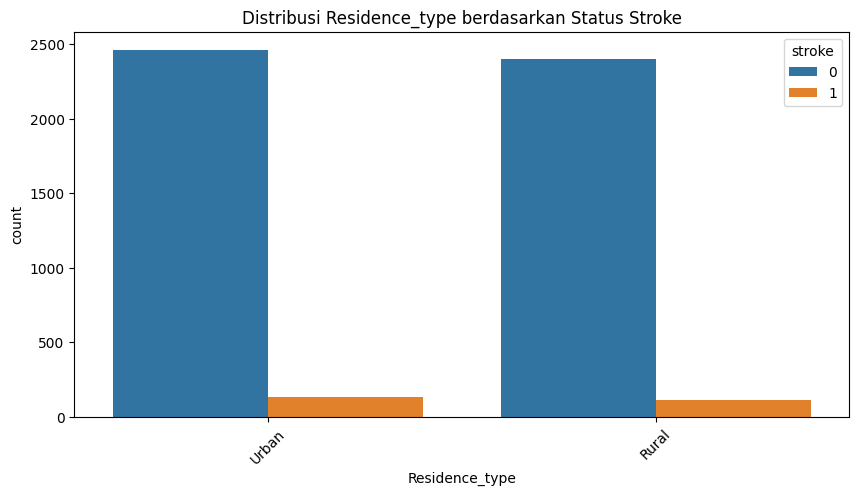

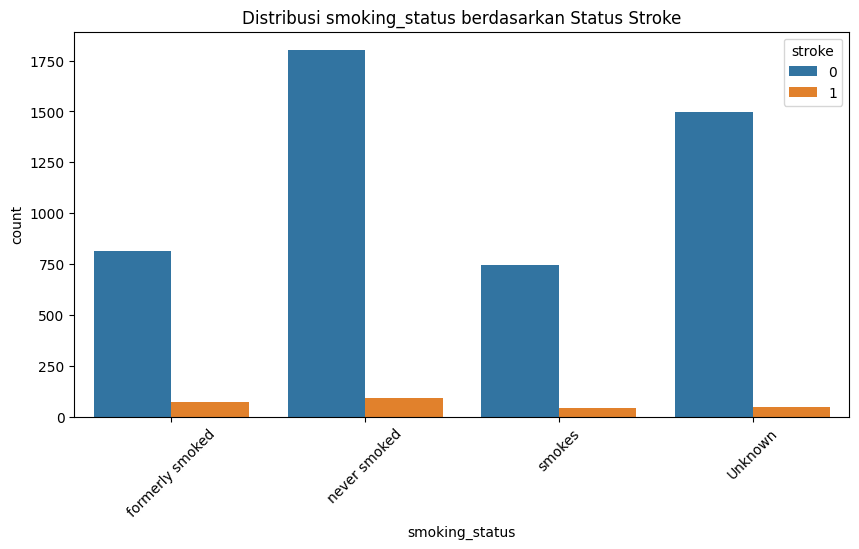

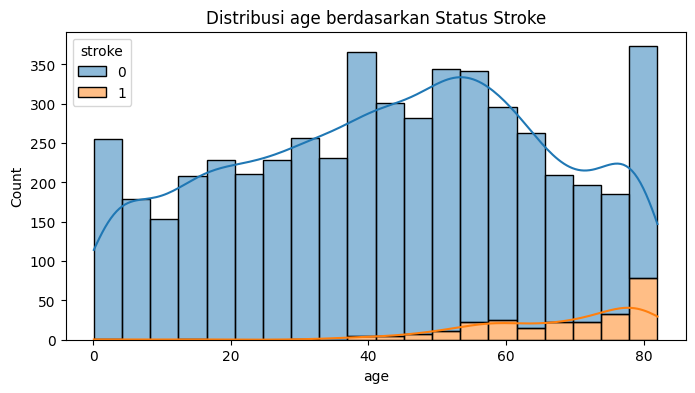

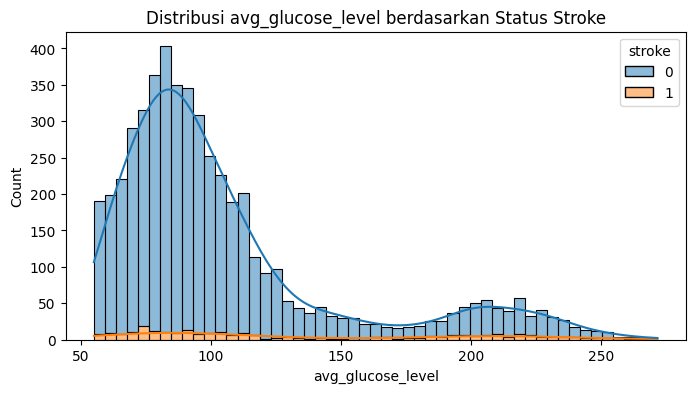

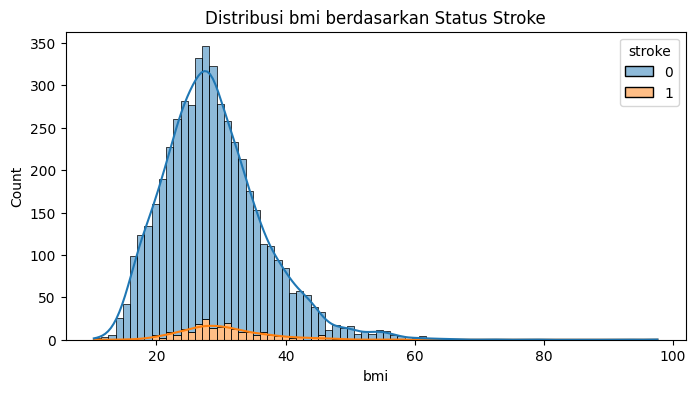

In [4]:
# Membuat salinan agar dataset mentah tetap terjaga
df_eda = df_raw.copy()

# 1. Melihat ringkasan statistik dari fitur numerik
print("--- Statistik Deskriptif (Fitur Numerik) ---")
display(df_eda.describe())

# 2. Menampilkan jumlah data kosong pada setiap kolom
print("\n--- Jumlah Missing Value per Kolom ---")
display(df_eda.isna().sum())

# 3. Analisis Kolom Target ('stroke')
print("\n--- Distribusi Kolom Target (stroke) ---")
stroke_dist = df_eda["stroke"].value_counts(normalize=True) * 100
print(stroke_dist)

plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x="stroke")
plt.title("Distribusi Target: Stroke vs Non-Stroke")
plt.show()

# 4. Melihat distribusi beberapa fitur kategorikal
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_eda, x=col, hue="stroke")
    plt.title(f"Distribusi {col} berdasarkan Status Stroke")
    plt.xticks(rotation=45)
    plt.show()

# 5. Analisis fitur numerik yang berpengaruh
numeric_cols = ["age", "avg_glucose_level", "bmi"]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_eda, x=col, kde=True, hue="stroke", multiple="stack")
    plt.title(f"Distribusi {col} berdasarkan Status Stroke")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# Salin ulang dataset agar versi mentah tetap aman
df_prep = df_raw.copy()

# --- 1. PEMBERSIHAN DATA ---

# a. Cek dan hapus duplikasi jika ada
before = len(df_prep)
df_prep = df_prep.drop_duplicates()
after = len(df_prep)
print(f"Duplikasi dihapus: {before - after} baris")

# b. Menangani missing values
print("\nMissing value sebelum ditangani:")
print(df_prep.isna().sum())

# Beberapa kolom seperti 'bmi' memiliki nilai kosong → kita isi dengan median
df_prep['bmi'] = df_prep['bmi'].fillna(df_prep['bmi'].median())

print("\nMissing value setelah penanganan:")
print(df_prep.isna().sum())

# --- 2. ENCODING KOLOM TARGET ---
# Kolom target 'stroke' sudah berupa 0 dan 1 → tidak perlu diubah
y = df_prep['stroke']

# --- 3. PEMISAHAN FITUR DAN TARGET ---
X = df_prep.drop('stroke', axis=1)

# --- 4. IDENTIFIKASI KOLOM NUMERIK & KATEGORIKAL --->

numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = [col for col in X.columns if col not in numeric_features]

print(f"\nFitur numerik: {numeric_features}")
print(f"Fitur kategorikal: {categorical_features}")

# --- 5. MEMBUAT PIPELINE PREPROCESSING ---

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Transformer untuk numerik
numeric_transformer = StandardScaler()

# Transformer untuk kategorikal
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Gabungkan keduanya dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- 6. FIT & TRANSFORM DATA ---
print("\nMenjalankan proses scaling & encoding...")
X_processed = preprocessor.fit_transform(X)

# --- 7. MEMBANGUN DATAFRAME FINAL ---

# Ambil nama fitur hasil encoding
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Gabungkan nama numerik + kategorikal
new_feature_names = numeric_features + list(encoded_cat_features)

# Buat dataframe hasil transformasi
df_processed = pd.DataFrame(X_processed, columns=new_feature_names)

# Gabungkan kembali dengan target
df_final = pd.concat([df_processed, y.reset_index(drop=True)], axis=1)

# --- 8. SIMPAN HASIL PREPROCESSING ---

import os
output_folder = "preprocessing"
output_filename = f"{output_folder}/stroke_preprocessed.csv"

os.makedirs(output_folder, exist_ok=True)
df_final.to_csv(output_filename, index=False)

print("\nPreprocessing selesai!")
print(f"File disimpan di: {output_filename}")

# Tampilkan hasil
print("\n--- Contoh 5 Baris Data Setelah Preprocessing ---")
display(df_final.head())

print("\n--- Info Dataset Setelah Preprocessing ---")
df_final.info()

Duplikasi dihapus: 0 baris

Missing value sebelum ditangani:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing value setelah penanganan:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Fitur numerik: ['age', 'avg_glucose_level', 'bmi']
Fitur kategorikal: ['id', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Menjalankan proses scaling & encoding...

Preprocessing selesai!
File disimpan di: preprocessing/stroke_preprocesse

age  avg_glucose_level       bmi  id_67  id_77  id_84  id_91  id_99  \
0  1.051434           2.706375  1.005086    0.0    0.0    0.0    0.0    0.0   
1  0.786070           2.121559 -0.098981    0.0    0.0    0.0    0.0    0.0   
2  1.626390          -0.005028  0.472536    0.0    0.0    0.0    0.0    0.0   
3  0.255342           1.437358  0.719327    0.0    0.0    0.0    0.0    0.0   
4  1.582163           1.501184 -0.631531    0.0    0.0    0.0    0.0    0.0   

   id_121  id_129  id_132  id_156  id_163  id_170  id_172  id_187  id_205  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_210  id_224  id_239  id_242  id_247  id_259  id_298  id_315  id_321  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_338  id_347  id_354  id_355  id_364  id_365  id_394  id_448  id_452  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_458  id_464  id_479  id_491  id_507  id_530  id_533  id_542  id_545  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_559  id_563  id_575  id_579  id_587  id_621  id_641  id_711  id_712  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_721  id_724  id_727  id_728  id_737  id_739  id_742  id_751  id_760  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_768  id_782  id_808  id_809  id_820  id_841  id_844  id_875  id_887  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   id_897  id_917  id_924  id_937  id_949  id_954  id_966  id_967  id_1077  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0 


--- Info Dataset Setelah Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Columns: 5134 entries, age to stroke
dtypes: float64(5133), int64(1)
memory usage: 200.2 MB
